In [19]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image, ImageChops


import cv2

In [21]:
vidcap = cv2.VideoCapture('test_videos/T_3.mp4')
success,image = vidcap.read()
count = 0
success = True
success,image = vidcap.read()
cv2.imwrite("video_frames/BBBBBBBB%d.jpg" % count, image)     # save frame as JPEG file
img = cv2.imread("video_frames/BBBBBBBB%d.jpg" % count)

In [22]:
def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

im = Image.open("video_frames/BBBBBBBB%d.jpg" % count)
im = trim(im)
i

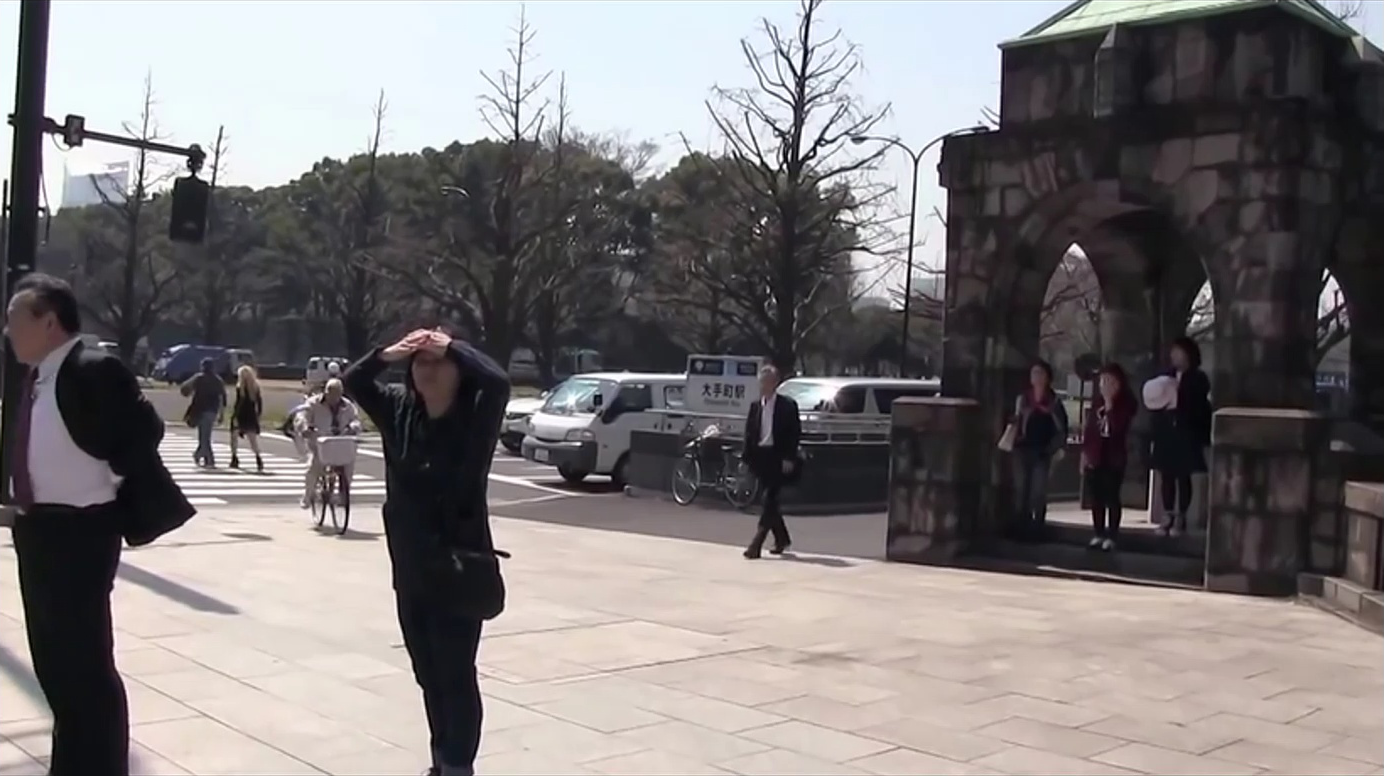

In [23]:
im

In [11]:
img[0][3]

array([1, 1, 1], dtype=uint8)

In [12]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)
contours,hierarchy,_ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#cnt = contours[0]
#x,y,w,h = cv2.boundingRect(cnt)
#crop = img[y:y+h,x:x+w]
#cv2.imwrite("video_frames/BBBBBBBB%d.jpg" % count, crop)
#cv2.imshow('image',img)

In [17]:
hierarchy

[array([[[1645, 1078]],
 
        [[1647, 1078]]], dtype=int32), array([[[ 272, 1074]],
 
        [[ 272, 1075]],
 
        [[1647, 1075]],
 
        [[1647, 1074]]], dtype=int32), array([[[743, 935]]], dtype=int32), array([[[1651,  933]],
 
        [[1651,  934]]], dtype=int32), array([[[1648,  932]]], dtype=int32), array([[[695, 932]]], dtype=int32), array([[[266, 932]],
 
        [[267, 932]]], dtype=int32), array([[[1655,  931]]], dtype=int32), array([[[1600,  931]],
 
        [[1607,  931]]], dtype=int32), array([[[1288,  931]]], dtype=int32), array([[[1040,  931]],
 
        [[1135,  931]]], dtype=int32), array([[[703, 931]]], dtype=int32), array([[[474, 931]],
 
        [[478, 931]]], dtype=int32), array([[[269, 931]]], dtype=int32), array([[[1648,  930]],
 
        [[1649,  930]]], dtype=int32), array([[[1421,  930]],
 
        [[1423,  930]]], dtype=int32), array([[[1144,  930]],
 
        [[1151,  930]]], dtype=int32), array([[[1005,  930]],
 
        [[1007,  930]]], dtype=i

In [7]:
a = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [8]:
a[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
a[1]

[array([[[ 268,  151]],
 
        [[ 268,  633]],
 
        [[ 269,  634]],
 
        [[ 269,  639]],
 
        [[ 268,  640]],
 
        [[ 268,  928]],
 
        [[ 319,  928]],
 
        [[ 320,  927]],
 
        [[ 395,  927]],
 
        [[ 396,  928]],
 
        [[ 696,  928]],
 
        [[ 697,  927]],
 
        [[ 711,  927]],
 
        [[ 712,  928]],
 
        [[ 714,  928]],
 
        [[ 715,  927]],
 
        [[ 735,  927]],
 
        [[ 736,  928]],
 
        [[ 737,  927]],
 
        [[ 738,  927]],
 
        [[ 739,  928]],
 
        [[1651,  928]],
 
        [[1651,  151]],
 
        [[1575,  151]],
 
        [[1574,  152]],
 
        [[1573,  152]],
 
        [[1572,  151]],
 
        [[1553,  151]],
 
        [[1552,  152]],
 
        [[1551,  151]],
 
        [[1550,  151]],
 
        [[1549,  152]],
 
        [[1547,  152]],
 
        [[1546,  151]],
 
        [[1359,  151]],
 
        [[1358,  152]],
 
        [[1357,  152]],
 
        [[1356,  151]],
 
        [[10

In [10]:
a[2]

array([[[-1, -1, -1, -1]]], dtype=int32)

In [11]:
a[3]

IndexError: tuple index out of range

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image


import cv2

vidcap = cv2.VideoCapture('test_videos/T_3.mp4')
success,image = vidcap.read()
count = 0
success = True
while success and count < 10:
  success,image = vidcap.read()
  cv2.imwrite("video_frames/frame%d.jpg" % count, image)     # save frame as JPEG file
  img = cv2.imread("video_frames/frame%d.jpg" % count)
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  _,thresh = cv2.threshold(gray,10,255,cv2.THRESH_BINARY)
  contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  cnt = contours[0]
  x,y,w,h = cv2.boundingRect(cnt)
  crop = img[y:y+h,x:x+w]
  cv2.imwrite("video_frames/frame%d.jpg" % count, crop)
  count += 1
  #if (count > 500):
  #      success = False